In [1]:
import utils
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

# RQ4: impact of $k$

This notebook shows how to plot Figure 6 of the paper.

1.First load the results we got from RQ1.

In [2]:
dpp_results={}
for i in range(2,11):
    dpp_results[i]=pd.read_pickle(f"../Data/dpp_results_{i}.pkl")
tc_results={}
for i in range(2,11):
    tc_results[i]=pd.read_pickle(f"../Data/tc_results_{i}.pkl")

2.Plot the figure of TP and FP.

/tmp/ipykernel_3089688/2081294521.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x)
/tmp/ipykernel_3089688/2081294521.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x, fontsize=18)
/tmp/ipykernel_3089688/2081294521.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks().astype(int), fontsize=18)


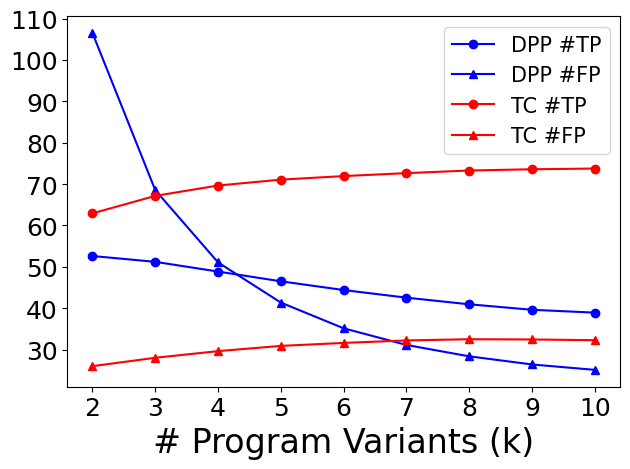

In [7]:

dfp_tp = [df['TP_rate'].sum() for df in dpp_results.values()]
dfp_fp=[df['FP_rate'].sum() for df in dpp_results.values()]

tc_tp=[df['TP_rate'].sum() for df in tc_results.values()]
tc_fp=[df['FP_rate'].sum() for df in tc_results.values()]



fig, ax = plt.subplots()


ax.plot(dfp_tp, label='DPP #TP', linestyle='-', marker='o', color='blue')
ax.plot(dfp_fp, label='DPP #FP', linestyle='-', marker='^', color='blue')
ax.plot(tc_tp, label='TC #TP', linestyle='-', marker='o', color='red')
ax.plot(tc_fp, label='TC #FP', linestyle='-', marker='^', color='red')

ax.legend(fontsize=15)


ax.set_title('')
ax.set_xlabel('# Program Variants (k)',fontsize=24)
ax.set_ylabel('',fontsize=22)
x = np.arange(1, 11)
ax.set_xticklabels(x)
ax.set_xticklabels(x, fontsize=18)  
ax.set_yticklabels(ax.get_yticks().astype(int), fontsize=18) 
plt.tight_layout()
plt.show()

3.Plot the figure of precision and F1 score.

/tmp/ipykernel_3089688/2873636690.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x)
/tmp/ipykernel_3089688/2873636690.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x, fontsize=18)
/tmp/ipykernel_3089688/2873636690.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([float(f"{m:.1f}") for m in ax.get_yticks()], fontsize=18)


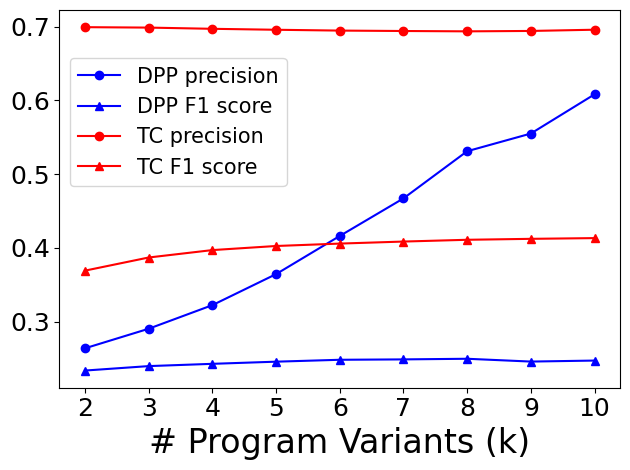

In [8]:
dfp_precision = [df['precision'].mean() for df in dpp_results.values()]
tc_precison=[df['precision'].mean() for df in tc_results.values()]
dfp_F1=[2*df['precision'].mean()*(df['TP_rate'].sum()/251)/(df['precision'].mean()+(df['TP_rate'].sum()/251)) for df in dpp_results.values()]
tc_F1=[2*df['precision'].mean()*(df['TP_rate'].sum()/251)/(df['precision'].mean()+(df['TP_rate'].sum()/251)) for df in tc_results.values()]

fig, ax = plt.subplots()


ax.plot(dfp_precision, label='DPP precision', linestyle='-', marker='o', color='blue')
ax.plot(dfp_F1, label='DPP F1 score', linestyle='-', marker='^', color='blue')
ax.plot(tc_precison, label='TC precision', linestyle='-', marker='o', color='red')
ax.plot(tc_F1, label='TC F1 score', linestyle='-', marker='^', color='red')


ax.legend(fontsize=15,bbox_to_anchor=(0, 0.9),loc='upper left')


ax.set_title('')
ax.set_xlabel('# Program Variants (k)',fontsize=24)
ax.set_ylabel('',fontsize=22)
x = np.arange(1, 11)
ax.set_xticklabels(x)
ax.set_xticklabels(x, fontsize=18) 
ax.set_yticklabels([float(f"{m:.1f}") for m in ax.get_yticks()], fontsize=18) 
plt.tight_layout()
plt.show()